In [30]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from scipy import stats

In [2]:
df=pd.read_csv("cars.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.size

2709

In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#deleting unwanted car name from data set

In [8]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [9]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#converting year values to age of car

In [11]:
df.Year=2022-df.Year

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,8,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,9,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,5,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,11,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,8,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [15]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,8.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,4.000000,0.100000,0.320000,500.000000,0.000000
25%,6.000000,0.900000,1.200000,15000.000000,0.000000
50%,8.000000,3.600000,6.400000,32000.000000,0.000000
75%,10.000000,6.000000,9.900000,48767.000000,0.000000
max,19.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:>

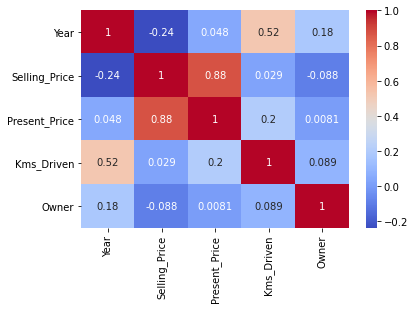

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [17]:
#converting categorical variables into numerical values
cat=df.select_dtypes(exclude=np.number)


In [18]:
cat.head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [19]:
df1=pd.get_dummies(cat,drop_first=True)

In [20]:
df1.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [22]:
df2=df.select_dtypes(include=np.number)

In [23]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,8,3.35,5.59,27000,0
1,9,4.75,9.54,43000,0
2,5,7.25,9.85,6900,0
3,11,2.85,4.15,5200,0
4,8,4.60,6.87,42450,0


In [31]:
from scipy import stats
data=df[(np.abs(stats.zscore(df2))<3).all(axis=1)]

In [32]:
df=pd.concat([df1,data],axis=1)

In [33]:
df.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,0,1,0,1,0.0,1.0,0.0,1.0,8.0,3.35,5.59,27000.0,0.0
1,1,0,0,1,1.0,0.0,0.0,1.0,9.0,4.75,9.54,43000.0,0.0
2,0,1,0,1,0.0,1.0,0.0,1.0,5.0,7.25,9.85,6900.0,0.0
3,0,1,0,1,0.0,1.0,0.0,1.0,11.0,2.85,4.15,5200.0,0.0
4,1,0,0,1,1.0,0.0,0.0,1.0,8.0,4.60,6.87,42450.0,0.0


In [34]:
df.isna().sum()

Fuel_Type_Diesel           0
Fuel_Type_Petrol           0
Seller_Type_Individual     0
Transmission_Manual        0
Fuel_Type_Diesel          26
Fuel_Type_Petrol          26
Seller_Type_Individual    26
Transmission_Manual       26
Year                      26
Selling_Price             26
Present_Price             26
Kms_Driven                26
Owner                     26
dtype: int64

In [35]:
df.dropna(inplace=True)

C:\Users\thota\pyana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kms_Driven'>

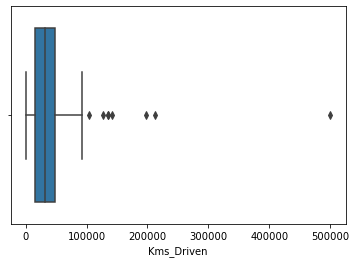

In [27]:
sns.boxplot(df['Kms_Driven'])

C:\Users\thota\pyana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

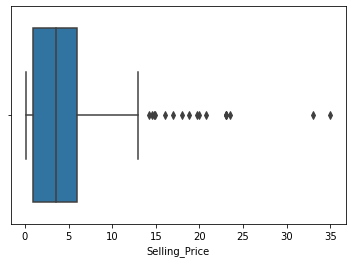

In [28]:
sns.boxplot(df["Selling_Price"])

C:\Users\thota\pyana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Present_Price'>

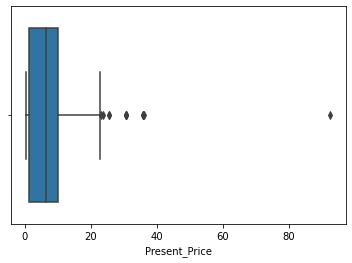

In [29]:
sns.boxplot(df["Present_Price"])

In [36]:
df.shape

(275, 13)

In [39]:
x=df.drop('Selling_Price',axis=1)

In [40]:
y=df['Selling_Price']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr=LinearRegression()

In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
p=lr.predict(x_test)

In [51]:
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
r2_score(y_test,p)

0.9003193116446779

In [52]:
mean_squared_error(y_test,p)

1.4730639652844415

In [53]:
from sklearn.model_selection import cross_val_score

In [61]:
cross_val_score(lr,x,y,cv=5)

array([  0.84983909,   0.73304112, -95.1238358 ,   0.76357659,
         0.84614855])

In [62]:
from sklearn.linear_model import Lasso

In [63]:
la=Lasso()

In [65]:
la.fit(x_train,y_train)

Lasso()

In [66]:
p=la.predict(x_test)

In [67]:
r2_score(y_test,p)

0.8562178726054974

In [69]:
from sklearn.linear_model import Ridge

In [70]:
r=Ridge()

In [71]:
r.fit(x_train,y_train)

Ridge()

In [72]:
pre=r.predict(x_test)

In [73]:
r2_score(y_test,pre)

0.8999416257585751

In [74]:
sc=cross_val_score(r,x,y,cv=5)

In [75]:
sc.mean()

-18.441428973418194